In [1]:
!head weather_forecast_data.csv

In [5]:
import pandas as pd
weather_df = pd.read_csv('weather_forecast_data.csv')
weather_df

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain

[2500 rows x 6 columns]

In [6]:
weather_df.shape

(2500, 6)

In [31]:
features = weather_df.columns[:-1]
X = weather_df[features]
y = weather_df['Rain']

X.describe()

Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593

In [32]:
X.corr()

Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
Temperature     1.000000 -0.014119   -0.004957     0.006632 -0.007489
Humidity       -0.014119  1.000000    0.003816     0.007244 -0.032089
Wind_Speed     -0.004957  0.003816    1.000000    -0.000405  0.018772
Cloud_Cover     0.006632  0.007244   -0.000405     1.000000  0.023100
Pressure       -0.007489 -0.032089    0.018772     0.023100  1.000000

In [64]:
f

'Temperature'

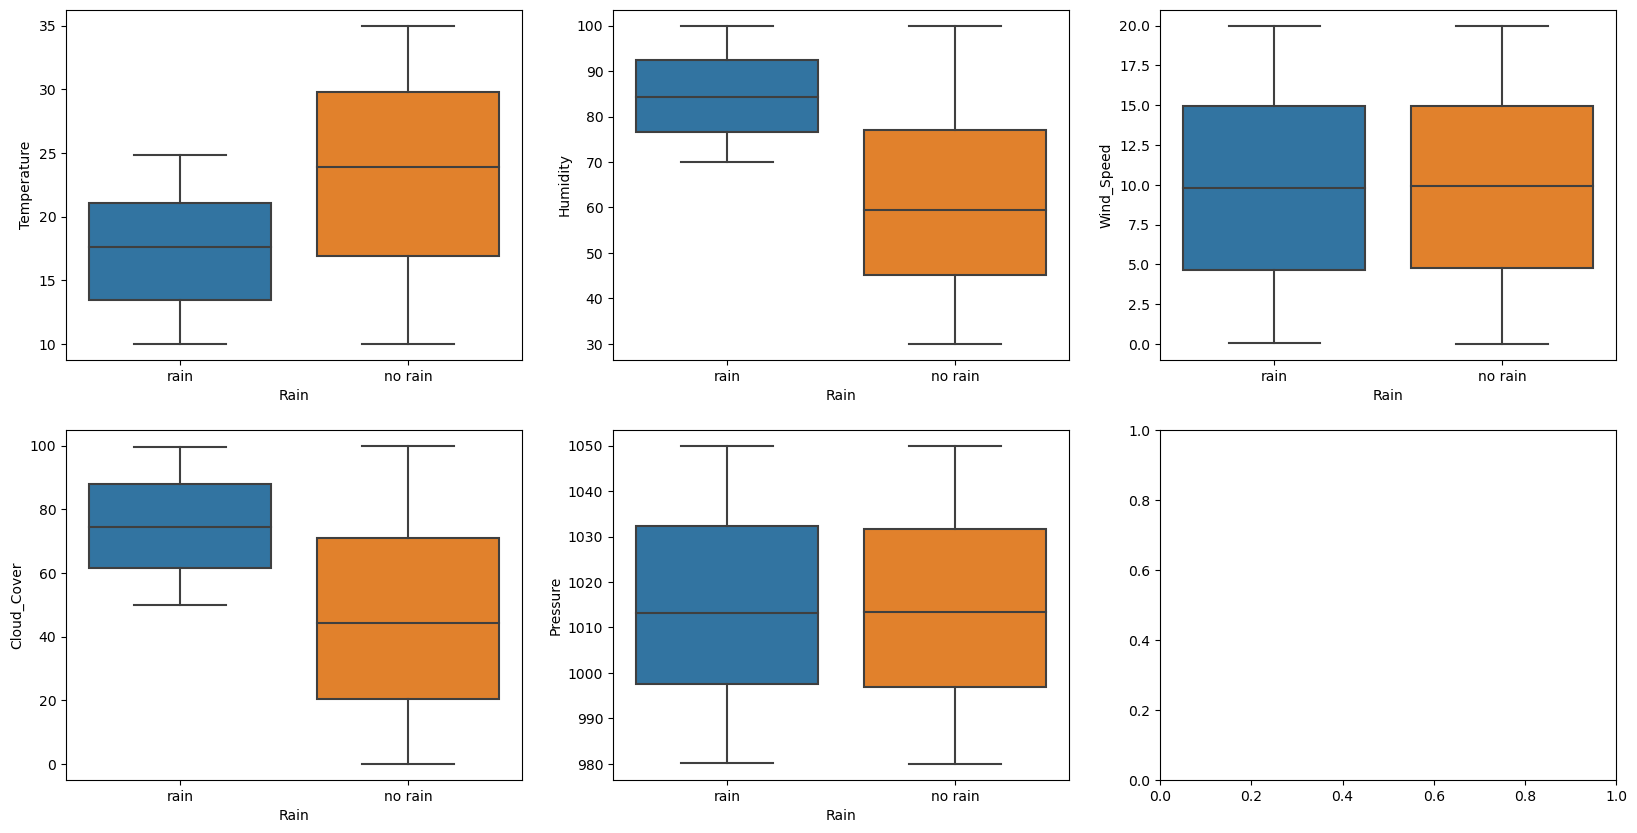

In [83]:
import matplotlib.pyplot as plt
import numpy as np

t, axes = plt.subplots(2,3, figsize=(20,10))

for f, ax in zip(features, axes.flatten()):
    sns.boxplot(x = 'Rain', y = f, data = weather_df, ax = ax)


In [43]:
components

array([[  1.61073077,   0.19639921,  30.99229675,  -1.38068144,
         -2.69959179],
       [-45.45059017,  -6.55980487, -26.04472207,  -5.23466456,
         -3.75706202],
       [-34.83858743, -15.90453592,  12.02752656,  -2.72704977,
         -8.4989797 ],
       ...,
       [ 25.54316531,  -1.14198925, -26.2371056 ,  -5.36669444,
         -6.83239007],
       [-46.33955987,  30.92955322,  14.44068464,   7.55654131,
         -7.79644722],
       [ 31.58264553, -29.74918565,  18.76655059,  -3.98551185,
          8.73026556]])

## PCA Plot

In [51]:
from sklearn.decomposition import PCA
import pandas as pd 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
  
# transform data 
X = scaler.fit_transform(X) 
  

pca = PCA(n_components = 3)
components = pca.fit_transform(X)

fig = px.scatter(components, x=2, y=1, color= weather_df['Rain'])
fig.show()


Results show no correlation between variables. This can be due to them having the nuisance variable of rain, so lets explore how these are corralated when divided by class.

In [27]:
X_rain = X.loc[(weather_df['Rain'] == 'rain'),:]
X_norain = X.loc[weather_df['Rain'] == 'norain',:]